# **Loading Complete Data**

In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import MeanShift
from sklearn.cluster import SpectralClustering
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

unclean_data=pd.read_csv('complete_dataset_uncleaned.csv')
data3=unclean_data.iloc[:,2:]
data3.index=data3.location
data3.pop('date')
data3.pop('location')


location
Afghanistan    Afghanistan
Afghanistan    Afghanistan
Afghanistan    Afghanistan
Afghanistan    Afghanistan
Afghanistan    Afghanistan
                  ...     
Zimbabwe          Zimbabwe
Zimbabwe          Zimbabwe
Zimbabwe          Zimbabwe
Zimbabwe          Zimbabwe
Zimbabwe          Zimbabwe
Name: location, Length: 210480, dtype: object

In [2]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()
scaler.fit(data3)
c=data3.columns
i=data3.index

data2 = pd.DataFrame(scaler.transform(data3))

data2.columns=c
data2.index=i
data2=data2.groupby('location').mean()
data2=data2.iloc[:,:-1]
data2

,new_cases_per_million,new_deaths_per_million,reproduction_rate,total_vaccinations_per_hundred,stringency_index,population_density,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy
location,,,,,,,,,,,,,
Afghanistan,0.000027,0.000377,0.197182,0.032023,0.317428,0.002642,0.009828,0.802514,0.291131,NaN,NaN,0.036232,0.345085
Albania,0.000630,0.002401,0.193133,0.123168,0.480092,0.005097,0.095827,0.348540,0.307718,0.159453,0.617898,0.209420,0.755602
Algeria,0.000033,0.000298,0.186843,0.064432,0.600788,0.000838,0.113977,0.308495,0.194313,0.013667,0.322443,0.137681,0.705109
Andorra,0.003150,0.003841,0.167931,0.272785,0.379243,0.007963,NaN,0.046144,0.236290,0.658314,0.427557,0.000000,0.909770
Angola,0.000016,0.000108,0.158165,0.067481,0.584861,0.001156,0.044363,0.304900,0.099865,NaN,NaN,0.000000,0.235136
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wallis and Futuna,0.000464,0.001904,NaN,0.228544,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.796534
Western Sahara,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.507320
Yemen,0.000002,0.000132,0.147292,0.004940,0.302925,0.002598,0.007034,0.644345,0.147596,0.170843,0.305398,0.050725,0.383627


In [3]:
"""j=0
importance=pd.read_csv('importance.csv')
importance=np.array(importance)
for i in importance:
  data2.iloc[:,j]=data2.iloc[:,j]*abs(i)
  j=j+1
data2"""

"j=0\nimportance=pd.read_csv('importance.csv')\nimportance=np.array(importance)\nfor i in importance:\n  data2.iloc[:,j]=data2.iloc[:,j]*abs(i)\n  j=j+1\ndata2"

In [4]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

In [5]:
data2=clean_dataset(data2)
temp_df=data2[['new_deaths_per_million','population_density','female_smokers']]
temp_imp=[2.8462, 0.0928, 0.1135]
for i in range(len(temp_imp)):
  temp_df.iloc[:,i]=temp_df.iloc[:,i]*temp_imp[i]
temp_df

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1951: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[selected_item_labels] = value


,new_deaths_per_million,population_density,female_smokers
location,,,
Albania,0.006834,0.000473,0.018098
Algeria,0.000847,0.000078,0.001551
Argentina,0.015594,0.000072,0.041625
Australia,0.003138,0.000014,0.033352
Austria,0.012810,0.000482,0.073167
...,...,...,...
Vanuatu,0.000417,0.000102,0.006981
Vietnam,0.002834,0.001391,0.002327
Yemen,0.000375,0.000241,0.019391


# **Standardizing Data**

In [6]:
#data=clean_dataset(data.iloc[:,1:])
#data=pd.DataFrame(scaler.inverse_transform(scaled_data))
#data

In [7]:
Ind=pd.DataFrame(temp_df[temp_df.index=='India'])
Ind

,new_deaths_per_million,population_density,female_smokers
location,,,
India,0.002017,0.002034,0.004654


# Finding Nearest Neighbour of Target Country

In [8]:
dist=[]
a=Ind
from scipy.spatial import distance
for index,row in temp_df.iterrows():
  row=pd.DataFrame(row)
  dst = distance.euclidean(a, row)
  dist.append(dst)

In [9]:
dst_target=pd.DataFrame(dist,temp_df.index)
dst_target.columns=['distance']
dst_target

,distance
location,
Albania,0.014366
Algeria,0.003850
Argentina,0.039434
Australia,0.028791
Austria,0.069376
...,...
Vanuatu,0.003421
Vietnam,0.002548
Yemen,0.014936


In [10]:
dst_target=dst_target.sort_values(by=['distance'])
dst_target

,distance
location,
India,0.000000
Thailand,0.001497
Cambodia,0.001690
Brunei,0.001858
Zimbabwe,0.002000
...,...
Chile,0.084369
Croatia,0.086356
Greece,0.087719


In [11]:
#X=X.iloc[:,[0,1,3,5,6,7,8,11]]
data = pd.read_csv('complete_dataset_cleaned.csv')
data.pop('Pkey')
data.pop('human_development_index')
data.pop('gdp_percentage_weekly')
data=data[data.location!='Romania']
data=data[data.location!='Latvia']
data=data[data.location!='Estonia']
data=data[data.location!='Ireland']
data=data[data.location!='Switzerland']
data=data[data.location!='Malta']

data=data.iloc[:,:-2]
data=data.iloc[:,1:]
data.head()
data

,location,date,new_cases_per_million,new_deaths_per_million,reproduction_rate,total_vaccinations_per_hundred,stringency_index,population_density,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,icu_patients_per_million
0,Algeria,7/17/2020,13.423,0.113,1.20,0.0,74.07,17.348,13913.839,278.364,6.73,0.7,30.4,1.90,76.88,1.403
1,Algeria,7/18/2020,13.604,0.249,1.18,0.0,74.07,17.348,13913.839,278.364,6.73,0.7,30.4,1.90,76.88,1.517
2,Algeria,7/20/2020,13.740,0.204,1.15,0.0,74.07,17.348,13913.839,278.364,6.73,0.7,30.4,1.90,76.88,1.449
3,Algeria,7/21/2020,13.287,0.294,1.14,0.0,74.07,17.348,13913.839,278.364,6.73,0.7,30.4,1.90,76.88,1.268
4,Algeria,7/22/2020,13.446,0.249,1.13,0.0,74.07,17.348,13913.839,278.364,6.73,0.7,30.4,1.90,76.88,1.154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28366,United States,10/7/2022,217.809,1.166,0.86,0.0,25.99,35.608,54225.446,151.089,10.79,19.1,24.6,2.77,78.86,7.875
28367,United States,10/8/2022,22.659,0.139,0.86,0.0,25.99,35.608,54225.446,151.089,10.79,19.1,24.6,2.77,78.86,7.772
28368,United States,10/9/2022,14.905,0.012,0.86,0.0,25.99,35.608,54225.446,151.089,10.79,19.1,24.6,2.77,78.86,7.852
28369,United States,10/10/2022,64.914,0.347,0.86,0.0,25.99,35.608,54225.446,151.089,10.79,19.1,24.6,2.77,78.86,7.855


In [12]:
temp=data.groupby('location').mean()
available=temp.index
available

Index(['Algeria', 'Argentina', 'Australia', 'Austria', 'Belgium', 'Bolivia',
       'Bulgaria', 'Canada', 'Chile', 'Cyprus', 'Czechia', 'Denmark',
       'Finland', 'France', 'Germany', 'Iceland', 'Israel', 'Italy', 'Japan',
       'Luxembourg', 'Malaysia', 'Netherlands', 'Portugal', 'Serbia',
       'Slovakia', 'Slovenia', 'South Africa', 'South Korea', 'Spain',
       'Sweden', 'United Kingdom', 'United States'],
      dtype='object', name='location')

In [13]:
dst_target=dst_target.loc[dst_target.index.isin(available)]

In [14]:
dst_target

,distance
location,
Algeria,0.003850
Malaysia,0.004832
South Korea,0.011162
South Africa,0.017784
Japan,0.024049
Canada,0.026583
Australia,0.028791
Iceland,0.032130
Israel,0.035255


#**Selecting Closest Country**

In [15]:
c=dst_target.index
n1=c[0]

In [16]:
n1

'Algeria'

In [17]:
data1=data[data['location']==n1]
data1.pop('location')
data1.index=data1.date
data1.pop('date')
data1

,new_cases_per_million,new_deaths_per_million,reproduction_rate,total_vaccinations_per_hundred,stringency_index,population_density,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,icu_patients_per_million
date,,,,,,,,,,,,,,
7/17/2020,13.423,0.113,1.20,0.0,74.07,17.348,13913.839,278.364,6.73,0.7,30.4,1.9,76.88,1.403
7/18/2020,13.604,0.249,1.18,0.0,74.07,17.348,13913.839,278.364,6.73,0.7,30.4,1.9,76.88,1.517
7/20/2020,13.740,0.204,1.15,0.0,74.07,17.348,13913.839,278.364,6.73,0.7,30.4,1.9,76.88,1.449
7/21/2020,13.287,0.294,1.14,0.0,74.07,17.348,13913.839,278.364,6.73,0.7,30.4,1.9,76.88,1.268
7/22/2020,13.446,0.249,1.13,0.0,74.07,17.348,13913.839,278.364,6.73,0.7,30.4,1.9,76.88,1.154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10/6/2022,0.091,0.045,0.64,0.0,45.32,17.348,13913.839,278.364,6.73,0.7,30.4,1.9,76.88,0.023
10/7/2022,0.091,0.000,0.64,0.0,45.32,17.348,13913.839,278.364,6.73,0.7,30.4,1.9,76.88,0.023
10/8/2022,0.000,0.000,0.64,0.0,45.32,17.348,13913.839,278.364,6.73,0.7,30.4,1.9,76.88,0.023


In [18]:
a=data1.index
b=data1.columns
data1=pd.DataFrame(scaler.transform(data1))
data1.index=a
data1.columns=b
df=data1.iloc[:,[0,1,2,3,4,5,13]]
df=clean_dataset(df)
df

/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,new_cases_per_million,new_deaths_per_million,reproduction_rate,total_vaccinations_per_hundred,stringency_index,population_density,icu_patients_per_million
date,,,,,,,
7/17/2020,6.883402e-05,0.000204,0.220690,0.0,0.7407,0.000838,0.007778
7/18/2020,6.976220e-05,0.000450,0.217241,0.0,0.7407,0.000838,0.008410
7/20/2020,7.045962e-05,0.000368,0.212069,0.0,0.7407,0.000838,0.008033
7/21/2020,6.813661e-05,0.000531,0.210345,0.0,0.7407,0.000838,0.007029
7/22/2020,6.895197e-05,0.000450,0.208621,0.0,0.7407,0.000838,0.006397
...,...,...,...,...,...,...,...
10/6/2022,4.666540e-07,0.000081,0.124138,0.0,0.4532,0.000838,0.000128
10/7/2022,4.666540e-07,0.000000,0.124138,0.0,0.4532,0.000838,0.000128
10/8/2022,0.000000e+00,0.000000,0.124138,0.0,0.4532,0.000838,0.000128


In [19]:
#data2=unclean_data.iloc[:,3:]
#data2.head()

# **Plot Your Data**

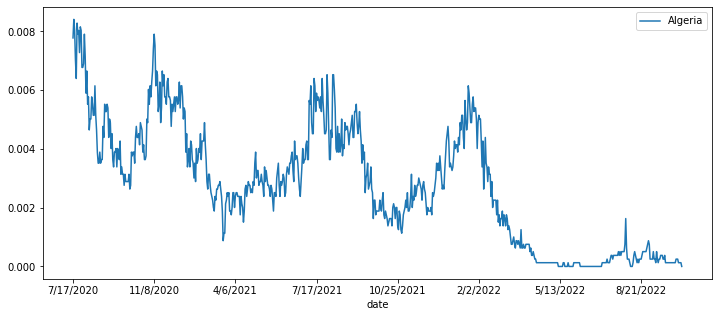

In [20]:
df.icu_patients_per_million.plot(figsize=(12,5), label=n1)
plt.legend(loc="upper right")


# **Check For Stationarity**

In [21]:
from statsmodels.tsa.stattools import adfuller

def adf_test(dataset):
  dftest = adfuller(dataset, autolag = 'AIC')
  print("1. ADF : ",dftest[0])
  print("2. P-Value : ", dftest[1])
  print("3. Num Of Lags : ", dftest[2])
  print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
  print("5. Critical Values :")
  for key, val in dftest[4].items():
      print("\t",key, ": ", val)

In [22]:
adf_test(df['icu_patients_per_million'])

1. ADF :  -2.158154966229189
2. P-Value :  0.2217816331401683
3. Num Of Lags :  12
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 738
5. Critical Values :
	 1% :  -3.4392418578608983
	 5% :  -2.86546426916434
	 10% :  -2.568859710342903


# **Model for country 1**

In [23]:
pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [24]:
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [25]:
stepwise_fit = auto_arima(df['icu_patients_per_million'],exog=df.iloc[:,0:4], start_P=1,start_Q=1, start_D=1, m=14  ,trace=True, seasonal=True,
                          suppress_warnings=True)
print(df.shape)
train=df.iloc[:-90,:]
test=df.iloc[-90:,:]
print(train.shape,test.shape)
#print(test.iloc[0],test.iloc[-1])

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[14] intercept   : AIC=-9417.724, Time=8.19 sec
 ARIMA(0,1,0)(0,0,0)[14] intercept   : AIC=-9357.609, Time=0.74 sec
 ARIMA(1,1,0)(1,0,0)[14] intercept   : AIC=-9399.617, Time=2.25 sec
 ARIMA(0,1,1)(0,0,1)[14] intercept   : AIC=-9411.286, Time=2.89 sec
 ARIMA(0,1,0)(0,0,0)[14]             : AIC=-9359.246, Time=0.36 sec
 ARIMA(2,1,2)(0,0,1)[14] intercept   : AIC=-9419.671, Time=8.67 sec
 ARIMA(2,1,2)(0,0,0)[14] intercept   : AIC=-9422.231, Time=2.81 sec
 ARIMA(2,1,2)(1,0,0)[14] intercept   : AIC=-9420.128, Time=8.15 sec
 ARIMA(1,1,2)(0,0,0)[14] intercept   : AIC=-9420.964, Time=2.52 sec
 ARIMA(2,1,1)(0,0,0)[14] intercept   : AIC=-9351.521, Time=2.49 sec
 ARIMA(3,1,2)(0,0,0)[14] intercept   : AIC=-9422.361, Time=1.14 sec
 ARIMA(3,1,2)(1,0,0)[14] intercept   : AIC=-9420.304, Time=8.05 sec
 ARIMA(3,1,2)(0,0,1)[14] intercept   : AIC=-9420.008, Time=1.97 sec
 ARIMA(3,1,2)(1,0,1)[14] intercept   : AIC=-9418.124, Time=2.19 sec
 ARIM

90
0.0009642357259986954


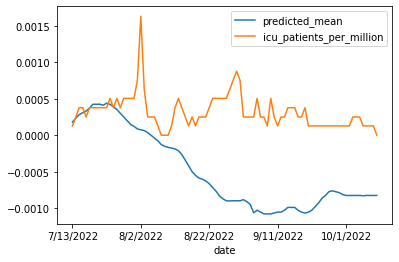

In [26]:
modela=ARIMA(endog=train['icu_patients_per_million'],exog=train.iloc[:,0:4] ,order=(0,1,3),seasonal_order=(0,0,0,14) )
modela=modela.fit()
modela.summary()
start=len(train)
end=len(train)+len(test)-1
pred=modela.predict(exog=test.iloc[:,0:4],start=start,end=end)
pred.index=df.index[start:end+1]
print(len(pred))
pred.plot(legend='ARIMA Predictions')
test['icu_patients_per_million'].plot(legend=True)
test['icu_patients_per_million'].mean()
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(pred,test['icu_patients_per_million']))
print(rmse)

## **PREPING DATA FOR ANN**


In [27]:
predicted_list, error_list = [], []
training_data = train
modela = ARIMA(endog=train['icu_patients_per_million'],exog=train.iloc[:,0:4] ,order=(0,1,3),seasonal_order=(0,0,0,14))
model_fit = modela.fit()
for t in range(len(test)):
    predicted_value = pred[t]
    error_list.append(test.iloc[t,-1] - predicted_value)
    predicted_list.append(predicted_value)
    obs = test.iloc[t,-1]
    training_data[t]=obs
    
error = mean_squared_error(test.iloc[0:90,-1], predicted_list[0:90])
print('Test MSE: %.3f' % error)
training_error = model_fit.resid
training_error=np.array(training_error)

Test MSE: 0.000


##**Building ann model to predict error by seeing the previous 7 day error in prediction**

In [28]:
from keras.models import Sequential
from keras.layers import Dense,Activation
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error as mse

model = Sequential()
model.add(Dense(50, input_dim=7, activation="tanh"))
model.add(Dense(25,  activation="tanh"))
model.add(Dense(25,  activation="sigmoid"))
model.add(Dense(1))
model.add(Activation("linear"))
model.compile(loss='mean_squared_error', optimizer='adam')
train_X,train_Y = [],[]
for i in range(0 , len(training_error) - 7):
    train_X.append(training_error[i:i+7])
    train_Y.append(training_error[i+7])

train_X=np.array(train_X)
train_Y=np.array(train_Y)
new_train_X,new_train_Y = [],[]
for i in train_X:
    new_train_X.append(i.reshape(-1)) 
for i in train_Y:
    new_train_Y.append(i.reshape(-1))
new_train_X = np.array(new_train_X)
new_train_Y = np.array(new_train_Y)
model.fit(new_train_X,new_train_Y, epochs=100, batch_size=20,verbose=1)
test_data = []
for i in error_list:
    try:
        test_data.append(i[0])
    except:
        test_data.append(i)
test_data = np.array(test_data)

Epoch 1/100
33/33 [==============================] - 1s 3ms/step - loss: 2.8643e-04
Epoch 2/100
33/33 [==============================] - 0s 3ms/step - loss: 7.2793e-06
Epoch 3/100
33/33 [==============================] - 0s 3ms/step - loss: 4.1729e-07
Epoch 4/100
33/33 [==============================] - 0s 3ms/step - loss: 2.1986e-07
Epoch 5/100
33/33 [==============================] - 0s 3ms/step - loss: 2.4062e-07
Epoch 6/100
33/33 [==============================] - 0s 3ms/step - loss: 2.5032e-07
Epoch 7/100
33/33 [==============================] - 0s 3ms/step - loss: 2.1882e-07
Epoch 8/100
33/33 [==============================] - 0s 3ms/step - loss: 2.3697e-07
Epoch 9/100
33/33 [==============================] - 0s 3ms/step - loss: 2.4154e-07
Epoch 10/100
33/33 [==============================] - 0s 3ms/step - loss: 2.2625e-07
Epoch 11/100
33/33 [==============================] - 0s 3ms/step - loss: 2.4201e-07
Epoch 12/100
33/33 [==============================] - 0s 2ms/step - loss: 

3/3 [==============================] - 0s 4ms/step


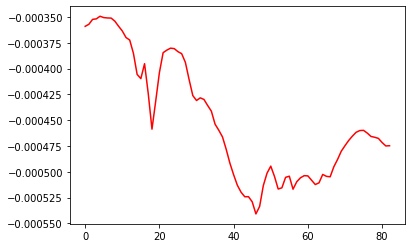

Test MSE: 0.000


In [29]:
test_X,test_Y = [],[]
for i in range(0 , len(test_data) - 7):
    test_X.append(test_data[i:i+7])
    test_Y.append(test_data[i+7])

new_test_X,new_test_Y = [],[]
for i in test_X:
    new_test_X.append(i.reshape(-1))
for i in test_Y:
    new_test_Y.append(i.reshape(-1))
new_test_X = np.array(new_test_X)
new_test_Y = np.array(new_test_Y)

predictions = model.predict(new_test_X)

Y = pd.DataFrame(new_test_Y)
pred = pd.DataFrame(predictions)

import matplotlib.pyplot as plt
plt.plot(predictions , color = 'r')
plt.show()
error = mse(test_data[7:],predictions)
print('Test MSE: %.3f' % error)

In [30]:
pred

,0
0,-0.000359
1,-0.000357
2,-0.000352
3,-0.000352
4,-0.000349
...,...
78,-0.000467
79,-0.000468
80,-0.000472
81,-0.000475


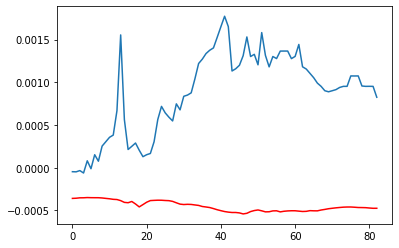

Test MSE: 0.000


In [31]:
plt.plot(Y)
plt.plot(pred , color = 'r')
#p.plot()
plt.show()
error = mse(test_data[7:],predictions)
print('Test MSE: %.3f' % error)

##**Calculating the sum of prediction value by arima and amount error by the ann***

Test MSE: 0.000


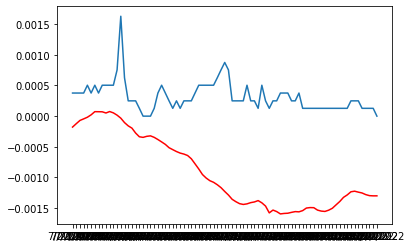

In [32]:
pred=np.array(pred)
pred= pred.tolist()
l= len(pred)
pred_final=[]
for i in range(l):
 temp = pred[i] + predicted_list[i]
 pred_final.append(temp)
error = mse(test.iloc[:83,-1],pred_final)
print('Test MSE: %.3f' % error)
Y = pd.DataFrame(test.iloc[7:,-1])
pred = pd.DataFrame(pred_final)
plt.plot(Y)
plt.plot(pred , color = 'r')
plt.rcParams['figure.figsize'] = [20, 5]
#p.plot()
plt.show()

# **Predicting for new country using 1NN**


In [33]:
unclean_data

,Pkey,continent,location,date,new_cases_per_million,new_deaths_per_million,reproduction_rate,total_vaccinations_per_hundred,stringency_index,population_density,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,icu_patients_per_million
0,Afghanistan43885,Asia,Afghanistan,2/24/2020,0.125,NaN,NaN,NaN,8.33,54.422,1803.987,597.029,9.59,NaN,NaN,0.5,64.83,NaN
1,Afghanistan43886,Asia,Afghanistan,2/25/2020,0.000,NaN,NaN,NaN,8.33,54.422,1803.987,597.029,9.59,NaN,NaN,0.5,64.83,NaN
2,Afghanistan43887,Asia,Afghanistan,2/26/2020,0.000,NaN,NaN,NaN,8.33,54.422,1803.987,597.029,9.59,NaN,NaN,0.5,64.83,NaN
3,Afghanistan43888,Asia,Afghanistan,2/27/2020,0.000,NaN,NaN,NaN,8.33,54.422,1803.987,597.029,9.59,NaN,NaN,0.5,64.83,NaN
4,Afghanistan43889,Asia,Afghanistan,2/28/2020,0.000,NaN,NaN,NaN,8.33,54.422,1803.987,597.029,9.59,NaN,NaN,0.5,64.83,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210475,Zimbabwe44842,Africa,Zimbabwe,10/8/2022,0.000,0.0,NaN,NaN,NaN,42.729,1899.775,307.846,1.82,1.6,30.7,1.7,61.49,NaN
210476,Zimbabwe44843,Africa,Zimbabwe,10/9/2022,0.000,0.0,NaN,76.42,NaN,42.729,1899.775,307.846,1.82,1.6,30.7,1.7,61.49,NaN
210477,Zimbabwe44844,Africa,Zimbabwe,10/10/2022,5.877,0.0,NaN,NaN,NaN,42.729,1899.775,307.846,1.82,1.6,30.7,1.7,61.49,NaN
210478,Zimbabwe44845,Africa,Zimbabwe,10/11/2022,0.000,0.0,NaN,NaN,NaN,42.729,1899.775,307.846,1.82,1.6,30.7,1.7,61.49,NaN


In [34]:
data4=unclean_data[unclean_data.location=='India']
data4.pop('Pkey')
#data4.pop('human_development_index')
#data4.pop('gdp_percentage_weekly')
data4=data4.iloc[:,1:]
data4.pop('location')
data4.index=data4.date
data4.pop('date')


date
1/30/2020      1/30/2020
1/31/2020      1/31/2020
2/1/2020        2/1/2020
2/2/2020        2/2/2020
2/3/2020        2/3/2020
                 ...    
10/8/2022      10/8/2022
10/9/2022      10/9/2022
10/10/2022    10/10/2022
10/11/2022    10/11/2022
10/12/2022    10/12/2022
Name: date, Length: 987, dtype: object

In [35]:
a=data4.index
b=data4.columns
data4=pd.DataFrame(scaler.transform(data4))
data4.index=a
data4.columns=b


In [36]:
df=data4.iloc[:,[0,1,2,3,4,5,13]]


In [37]:
df=df.iloc[:,:-1]
df=clean_dataset(df)


In [38]:
traini=df.iloc[:-90,:]
testi=df.iloc[-90:,:]

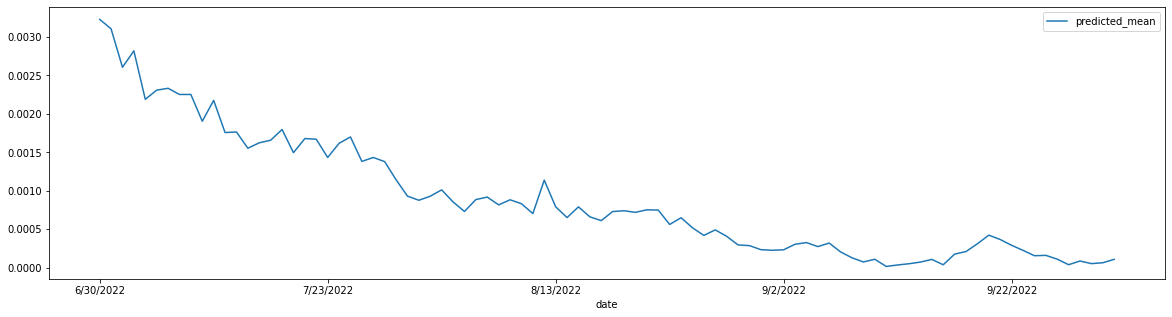

In [39]:
modela=ARIMA(endog=train['icu_patients_per_million'],exog=train.iloc[:,0:4] ,order=(0,1,3),seasonal_order=(0,0,0,14) )
modela=modela.fit()
modela.summary()
start=len(traini)
end=len(traini)+len(testi)-1
pred=modela.predict(exog=testi.iloc[:,0:4],start=start,end=end)
pred.index=df.index[start:end+1]
pred.plot(legend='ARIMA Predictions')

In [40]:
pred=pd.DataFrame(pred)
pred=pred.iloc[7:,:]
predictions=pd.DataFrame(predictions)
predictions.values.tolist()
predictions=predictions[0]
predictions.values.tolist()
pred


,predicted_mean
date,
7/7/2022,0.002253
7/8/2022,0.002252
7/10/2022,0.001905
7/11/2022,0.002175
7/12/2022,0.001758
...,...
9/27/2022,0.000040
9/28/2022,0.000087
9/29/2022,0.000054


In [41]:
pred=np.array(pred)
pred= pred.tolist()
l= len(pred)
pred_final=[]
for i in range(l):
 temp = pred[i] + predictions[i]
 pred_final.append(temp)
 print(temp)
#error = mse(test.iloc[:23,-1],pred_final)
#print('Test MSE: %.3f' % error)
#Y = pd.DataFrame(testi.iloc[7:,-1])


#plt.plot(pred_final , color = 'r')
#plt.show()

[0.00189347]
[0.00189538]
[0.00155237]
[0.00182361]
[0.00140832]
[0.00141415]
[0.00120272]
[0.00127319]
[0.00130369]
[0.00143783]
[0.00113229]
[0.00130997]
[0.00129834]
[0.00104815]
[0.00121164]
[0.00129066]
[0.00098694]
[0.00100903]
[0.00092098]
[0.00071258]
[0.00052709]
[0.00049253]
[0.00054786]
[0.00063221]
[0.00047499]
[0.00034802]
[0.00050052]
[0.00052469]
[0.00040661]
[0.00045731]
[0.00040138]
[0.00027603]
[0.00070883]
[0.0003568]
[0.00021074]
[0.00033742]
[0.00020214]
[0.00014613]
[0.00025218]
[0.00024916]
[0.00021721]
[0.00024009]
[0.00023028]
[3.85731835e-05]
[0.00012584]
[-8.87773088e-06]
[-0.00012072]
[-4.1202826e-05]
[-0.00010434]
[-0.00020428]
[-0.00020694]
[-0.00026924]
[-0.00028965]
[-0.00028233]
[-0.00019994]
[-0.00017713]
[-0.00024172]
[-0.000189]
[-0.00030046]
[-0.00037473]
[-0.00042868]
[-0.00039786]
[-0.00049542]
[-0.0004745]
[-0.00045036]
[-0.00043076]
[-0.00039634]
[-0.00045641]
[-0.00031092]
[-0.00026944]
[-0.00016279]
[-4.57563278e-05]
[-9.85682661e-05]
[-0.0001

In [42]:
p1=pred_final

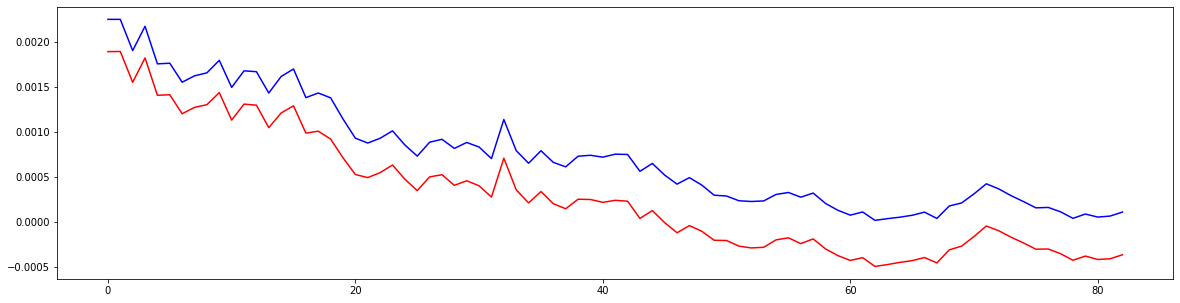

In [43]:
plt.plot(pred_final , label="ARIMA+ANN", color = 'r')
plt.plot(pred , label="ARIMA", color = 'b')

plt.show()

# **Model for country 2**

In [44]:
n2=c[1]
n2

'Malaysia'

In [45]:
data5=data[data['location']==n2]
data5.pop('location')
data5.index=data5.date
data5.pop('date')

date
3/24/2020      3/24/2020
3/25/2020      3/25/2020
3/26/2020      3/26/2020
3/27/2020      3/27/2020
3/28/2020      3/28/2020
                 ...    
10/9/2022      10/9/2022
10/10/2022    10/10/2022
10/11/2022    10/11/2022
10/12/2022    10/12/2022
10/13/2022    10/13/2022
Name: date, Length: 934, dtype: object

In [46]:
a=data5.index
b=data5.columns
data5=pd.DataFrame(scaler.transform(data5))
data5.index=a
data5.columns=b
df2=data5.iloc[:,[0,1,2,3,4,5,13]]
df2=clean_dataset(df2)
df2

,new_cases_per_million,new_deaths_per_million,reproduction_rate,total_vaccinations_per_hundred,stringency_index,population_density,icu_patients_per_million
date,,,,,,,
3/24/2020,0.000016,0.000108,0.287931,0.000000,0.7315,0.004678,0.011392
3/25/2020,0.000026,0.000161,0.279310,0.000000,0.7315,0.004678,0.009906
3/26/2020,0.000036,0.000269,0.268966,0.000000,0.7315,0.004678,0.011725
3/27/2020,0.000020,0.000108,0.253448,0.000000,0.7870,0.004678,0.012384
3/28/2020,0.000024,0.000323,0.239655,0.000000,0.7870,0.004678,0.015522
...,...,...,...,...,...,...,...
10/9/2022,0.000222,0.000108,0.227586,0.574000,0.3569,0.004678,0.006109
10/10/2022,0.000190,0.000161,0.227586,0.574027,0.3569,0.004678,0.006275
10/11/2022,0.000197,0.000161,0.227586,0.574027,0.3569,0.004678,0.007595


In [47]:
stepwise_fit = auto_arima(df2['icu_patients_per_million'],exog=df2.iloc[:,0:4], start_P=1,start_Q=1, start_D=1, m=14  ,trace=True, seasonal=True,
                          suppress_warnings=True)
print(df2.shape)
train=df2.iloc[:-90,:]
test=df2.iloc[-90:,:]
print(train.shape,test.shape)
#print(test.iloc[0],test.iloc[-1])

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(1,0,1)[14]             : AIC=-8308.325, Time=1.81 sec
 ARIMA(0,2,0)(0,0,0)[14]             : AIC=-7688.112, Time=0.22 sec
 ARIMA(1,2,0)(1,0,0)[14]             : AIC=-7967.655, Time=0.64 sec
 ARIMA(0,2,1)(0,0,1)[14]             : AIC=-8342.665, Time=0.74 sec
 ARIMA(0,2,1)(0,0,0)[14]             : AIC=-8356.399, Time=0.36 sec
 ARIMA(0,2,1)(1,0,0)[14]             : AIC=-8343.968, Time=0.62 sec
 ARIMA(0,2,1)(1,0,1)[14]             : AIC=-8341.993, Time=0.92 sec
 ARIMA(1,2,1)(0,0,0)[14]             : AIC=-8329.003, Time=0.32 sec
 ARIMA(0,2,2)(0,0,0)[14]             : AIC=-8373.734, Time=0.97 sec
 ARIMA(0,2,2)(1,0,0)[14]             : AIC=-8394.705, Time=1.81 sec
 ARIMA(0,2,2)(2,0,0)[14]             : AIC=-8392.723, Time=4.14 sec
 ARIMA(0,2,2)(1,0,1)[14]             : AIC=-8392.738, Time=3.68 sec
 ARIMA(0,2,2)(0,0,1)[14]             : AIC=-8394.068, Time=3.34 sec
 ARIMA(0,2,2)(2,0,1)[14]             : AIC=-8390.793, Time=4.96 sec
 ARIM

90
0.09677346096374367


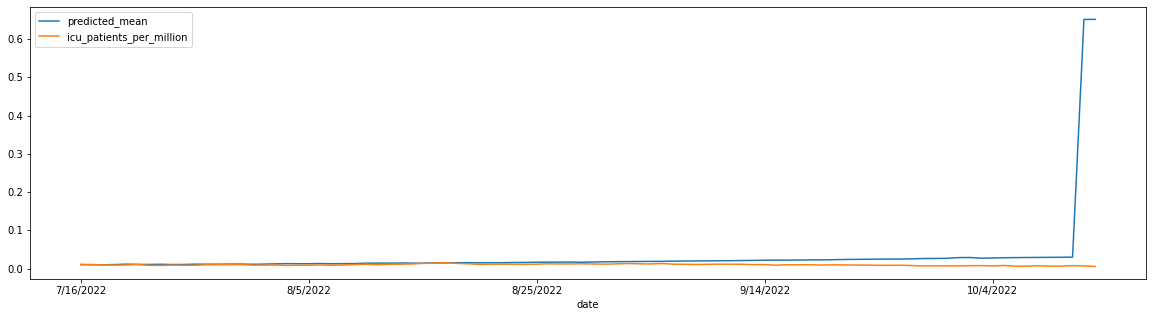

In [48]:
modela=ARIMA(endog=train['icu_patients_per_million'],exog=train.iloc[:,0:4] ,order=(0,2,3),seasonal_order=(1,0,0,14) )
modela=modela.fit()
modela.summary()
start=len(train)
end=len(train)+len(test)-1
pred=modela.predict(exog=test.iloc[:,0:4],start=start,end=end)
pred.index=df2.index[start:end+1]
print(len(pred))
pred.plot(legend='ARIMA Predictions')
test['icu_patients_per_million'].plot(legend=True)
test['icu_patients_per_million'].mean()
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(pred,test['icu_patients_per_million']))
print(rmse)

## **PREPING DATA FOR ANN**


In [49]:
predicted_list, error_list = [], []
training_data = train
modela = ARIMA(endog=train['icu_patients_per_million'],exog=train.iloc[:,0:4] ,order=(0,2,3),seasonal_order=(1,0,0,14))
model_fit = modela.fit()
for t in range(len(test)):
    predicted_value = pred[t]
    error_list.append(test.iloc[t,-1] - predicted_value)
    predicted_list.append(predicted_value)
    obs = test.iloc[t,-1]
    training_data[t]=obs
    
error = mean_squared_error(test.iloc[0:90,-1], predicted_list[0:90])
print('Test MSE: %.3f' % error)
training_error = model_fit.resid
training_error=np.array(training_error)

Test MSE: 0.009


##**Building ann model to predict error by seeing the previous 7 day error in prediction**

In [50]:
from keras.models import Sequential
from keras.layers import Dense,Activation
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error as mse

model = Sequential()
model.add(Dense(50, input_dim=7, activation="tanh"))
model.add(Dense(25,  activation="tanh"))
model.add(Dense(25,  activation="sigmoid"))
model.add(Dense(1))
model.add(Activation("linear"))
model.compile(loss='mean_squared_error', optimizer='adam')
train_X,train_Y = [],[]
for i in range(0 , len(training_error) - 7):
    train_X.append(training_error[i:i+7])
    train_Y.append(training_error[i+7])

train_X=np.array(train_X)
train_Y=np.array(train_Y)
new_train_X,new_train_Y = [],[]
for i in train_X:
    new_train_X.append(i.reshape(-1)) 
for i in train_Y:
    new_train_Y.append(i.reshape(-1))
new_train_X = np.array(new_train_X)
new_train_Y = np.array(new_train_Y)
model.fit(new_train_X,new_train_Y, epochs=100, batch_size=20,verbose=1)
test_data = []
for i in error_list:
    try:
        test_data.append(i[0])
    except:
        test_data.append(i)
test_data = np.array(test_data)

Epoch 1/100
42/42 [==============================] - 1s 3ms/step - loss: 0.2762
Epoch 2/100
42/42 [==============================] - 0s 2ms/step - loss: 0.0029
Epoch 3/100
42/42 [==============================] - 0s 2ms/step - loss: 3.3242e-05
Epoch 4/100
42/42 [==============================] - 0s 2ms/step - loss: 1.1229e-05
Epoch 5/100
42/42 [==============================] - 0s 2ms/step - loss: 1.0772e-05
Epoch 6/100
42/42 [==============================] - 0s 2ms/step - loss: 1.0458e-05
Epoch 7/100
42/42 [==============================] - 0s 3ms/step - loss: 1.0235e-05
Epoch 8/100
42/42 [==============================] - 0s 3ms/step - loss: 1.0024e-05
Epoch 9/100
42/42 [==============================] - 0s 3ms/step - loss: 9.8974e-06
Epoch 10/100
42/42 [==============================] - 0s 3ms/step - loss: 9.6538e-06
Epoch 11/100
42/42 [==============================] - 0s 2ms/step - loss: 9.3559e-06
Epoch 12/100
42/42 [==============================] - 0s 3ms/step - loss: 9.1273e-

3/3 [==============================] - 0s 3ms/step


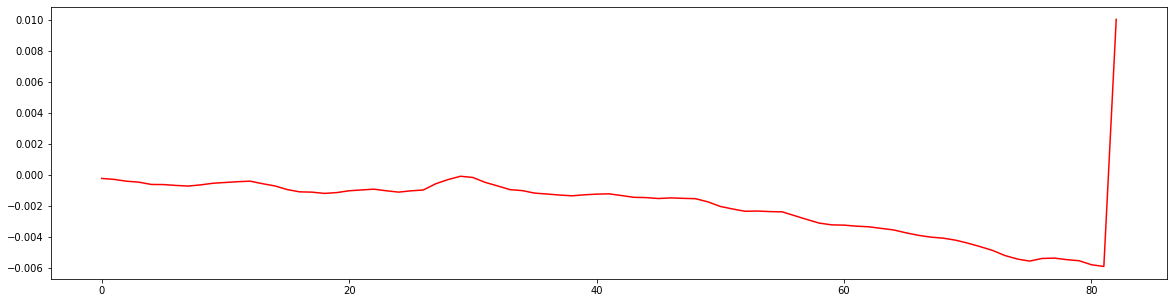

Test MSE: 0.010


In [51]:
test_X,test_Y = [],[]
for i in range(0 , len(test_data) - 7):
    test_X.append(test_data[i:i+7])
    test_Y.append(test_data[i+7])

new_test_X,new_test_Y = [],[]
for i in test_X:
    new_test_X.append(i.reshape(-1))
for i in test_Y:
    new_test_Y.append(i.reshape(-1))
new_test_X = np.array(new_test_X)
new_test_Y = np.array(new_test_Y)

predictions = model.predict(new_test_X)

Y = pd.DataFrame(new_test_Y)
pred = pd.DataFrame(predictions)

import matplotlib.pyplot as plt
plt.plot(predictions , color = 'r')
plt.show()
error = mse(test_data[7:],predictions)
print('Test MSE: %.3f' % error)

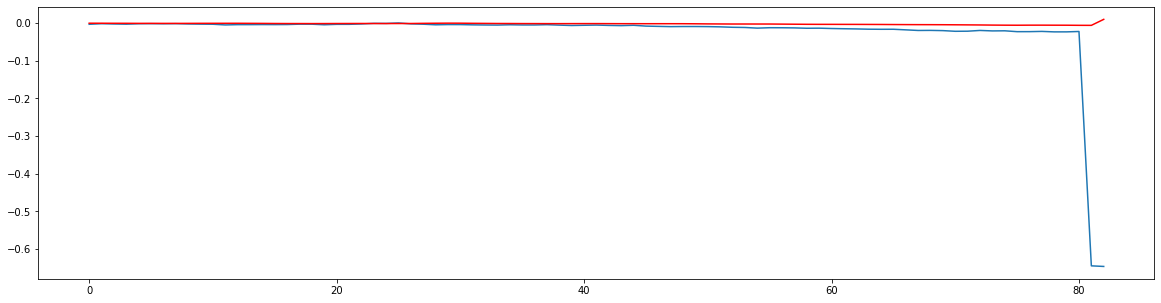

Test MSE: 0.010


In [52]:
plt.plot(Y)
plt.plot(pred , color = 'r')
#p.plot()
plt.show()
error = mse(test_data[7:],predictions)
print('Test MSE: %.3f' % error)

##**Calculating the sum of prediction value by arima and amount error by the ann***

Test MSE: 0.000


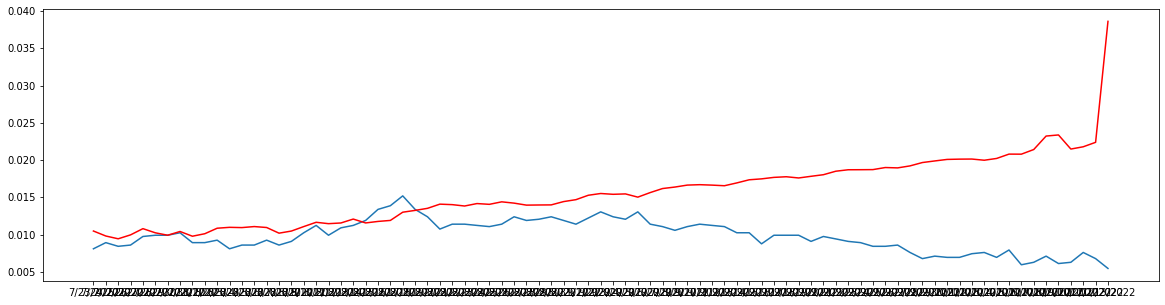

In [53]:
pred=np.array(pred)
pred= pred.tolist()
l= len(pred)
pred_final=[]
for i in range(l):
 temp = pred[i] + predicted_list[i]
 pred_final.append(temp)
error = mse(test.iloc[:83,-1],pred_final)
print('Test MSE: %.3f' % error)
Y = pd.DataFrame(test.iloc[7:,-1])
pred = pd.DataFrame(pred_final)
plt.plot(Y)
plt.plot(pred , color = 'r')
plt.rcParams['figure.figsize'] = [20, 5]
#p.plot()
plt.show()

# **Predicting for new country using 2NN**


In [54]:
unclean_data

,Pkey,continent,location,date,new_cases_per_million,new_deaths_per_million,reproduction_rate,total_vaccinations_per_hundred,stringency_index,population_density,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,icu_patients_per_million
0,Afghanistan43885,Asia,Afghanistan,2/24/2020,0.125,NaN,NaN,NaN,8.33,54.422,1803.987,597.029,9.59,NaN,NaN,0.5,64.83,NaN
1,Afghanistan43886,Asia,Afghanistan,2/25/2020,0.000,NaN,NaN,NaN,8.33,54.422,1803.987,597.029,9.59,NaN,NaN,0.5,64.83,NaN
2,Afghanistan43887,Asia,Afghanistan,2/26/2020,0.000,NaN,NaN,NaN,8.33,54.422,1803.987,597.029,9.59,NaN,NaN,0.5,64.83,NaN
3,Afghanistan43888,Asia,Afghanistan,2/27/2020,0.000,NaN,NaN,NaN,8.33,54.422,1803.987,597.029,9.59,NaN,NaN,0.5,64.83,NaN
4,Afghanistan43889,Asia,Afghanistan,2/28/2020,0.000,NaN,NaN,NaN,8.33,54.422,1803.987,597.029,9.59,NaN,NaN,0.5,64.83,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210475,Zimbabwe44842,Africa,Zimbabwe,10/8/2022,0.000,0.0,NaN,NaN,NaN,42.729,1899.775,307.846,1.82,1.6,30.7,1.7,61.49,NaN
210476,Zimbabwe44843,Africa,Zimbabwe,10/9/2022,0.000,0.0,NaN,76.42,NaN,42.729,1899.775,307.846,1.82,1.6,30.7,1.7,61.49,NaN
210477,Zimbabwe44844,Africa,Zimbabwe,10/10/2022,5.877,0.0,NaN,NaN,NaN,42.729,1899.775,307.846,1.82,1.6,30.7,1.7,61.49,NaN
210478,Zimbabwe44845,Africa,Zimbabwe,10/11/2022,0.000,0.0,NaN,NaN,NaN,42.729,1899.775,307.846,1.82,1.6,30.7,1.7,61.49,NaN


In [55]:
data4=unclean_data[unclean_data.location=='India']
data4.pop('Pkey')
#data4.pop('human_development_index')
#data4.pop('gdp_percentage_weekly')
data4=data4.iloc[:,1:]
data4.pop('location')
data4.index=data4.date
data4.pop('date')
data4

,new_cases_per_million,new_deaths_per_million,reproduction_rate,total_vaccinations_per_hundred,stringency_index,population_density,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,icu_patients_per_million
date,,,,,,,,,,,,,,
1/30/2020,0.001,NaN,NaN,NaN,10.19,450.419,6426.674,282.28,10.39,1.9,20.6,0.53,69.66,NaN
1/31/2020,0.000,NaN,NaN,NaN,10.19,450.419,6426.674,282.28,10.39,1.9,20.6,0.53,69.66,NaN
2/1/2020,0.000,NaN,NaN,NaN,10.19,450.419,6426.674,282.28,10.39,1.9,20.6,0.53,69.66,NaN
2/2/2020,0.001,NaN,NaN,NaN,10.19,450.419,6426.674,282.28,10.39,1.9,20.6,0.53,69.66,NaN
2/3/2020,0.001,NaN,NaN,NaN,10.19,450.419,6426.674,282.28,10.39,1.9,20.6,0.53,69.66,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10/8/2022,1.958,0.015,NaN,155.54,NaN,450.419,6426.674,282.28,10.39,1.9,20.6,0.53,69.66,NaN
10/9/2022,1.722,0.011,NaN,155.57,NaN,450.419,6426.674,282.28,10.39,1.9,20.6,0.53,69.66,NaN
10/10/2022,1.390,0.006,NaN,155.59,NaN,450.419,6426.674,282.28,10.39,1.9,20.6,0.53,69.66,NaN


In [56]:
a=data4.index
b=data4.columns
data4=pd.DataFrame(scaler.transform(data4))
data4.index=a
data4.columns=b
data4

,new_cases_per_million,new_deaths_per_million,reproduction_rate,total_vaccinations_per_hundred,stringency_index,population_density,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,icu_patients_per_million
date,,,,,,,,,,,,,,
1/30/2020,5.128065e-09,NaN,NaN,NaN,0.1019,0.021915,0.049585,0.314566,0.318213,0.041002,0.183239,0.038406,0.489393,NaN
1/31/2020,0.000000e+00,NaN,NaN,NaN,0.1019,0.021915,0.049585,0.314566,0.318213,0.041002,0.183239,0.038406,0.489393,NaN
2/1/2020,0.000000e+00,NaN,NaN,NaN,0.1019,0.021915,0.049585,0.314566,0.318213,0.041002,0.183239,0.038406,0.489393,NaN
2/2/2020,5.128065e-09,NaN,NaN,NaN,0.1019,0.021915,0.049585,0.314566,0.318213,0.041002,0.183239,0.038406,0.489393,NaN
2/3/2020,5.128065e-09,NaN,NaN,NaN,0.1019,0.021915,0.049585,0.314566,0.318213,0.041002,0.183239,0.038406,0.489393,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10/8/2022,1.004075e-05,0.000027,NaN,0.415449,NaN,0.021915,0.049585,0.314566,0.318213,0.041002,0.183239,0.038406,0.489393,NaN
10/9/2022,8.830529e-06,0.000020,NaN,0.415529,NaN,0.021915,0.049585,0.314566,0.318213,0.041002,0.183239,0.038406,0.489393,NaN
10/10/2022,7.128011e-06,0.000011,NaN,0.415583,NaN,0.021915,0.049585,0.314566,0.318213,0.041002,0.183239,0.038406,0.489393,NaN


In [57]:
df=data4.iloc[:,[0,1,2,3,4,5,13]]
df

,new_cases_per_million,new_deaths_per_million,reproduction_rate,total_vaccinations_per_hundred,stringency_index,population_density,icu_patients_per_million
date,,,,,,,
1/30/2020,5.128065e-09,NaN,NaN,NaN,0.1019,0.021915,NaN
1/31/2020,0.000000e+00,NaN,NaN,NaN,0.1019,0.021915,NaN
2/1/2020,0.000000e+00,NaN,NaN,NaN,0.1019,0.021915,NaN
2/2/2020,5.128065e-09,NaN,NaN,NaN,0.1019,0.021915,NaN
2/3/2020,5.128065e-09,NaN,NaN,NaN,0.1019,0.021915,NaN
...,...,...,...,...,...,...,...
10/8/2022,1.004075e-05,0.000027,NaN,0.415449,NaN,0.021915,NaN
10/9/2022,8.830529e-06,0.000020,NaN,0.415529,NaN,0.021915,NaN
10/10/2022,7.128011e-06,0.000011,NaN,0.415583,NaN,0.021915,NaN


In [58]:
df=df.iloc[:,:-1]
df=clean_dataset(df)
df

,new_cases_per_million,new_deaths_per_million,reproduction_rate,total_vaccinations_per_hundred,stringency_index,population_density
date,,,,,,
1/15/2021,0.000055,0.000224,0.163793,0.000000,0.6898,0.021915
1/16/2021,0.000055,0.000233,0.162069,0.000027,0.6898,0.021915
1/17/2021,0.000050,0.000186,0.162069,0.000053,0.6898,0.021915
1/18/2021,0.000037,0.000175,0.163793,0.000080,0.6898,0.021915
1/19/2021,0.000050,0.000208,0.165517,0.000134,0.6898,0.021915
...,...,...,...,...,...,...
9/27/2022,0.000013,0.000029,0.153448,0.413392,0.3704,0.021915
9/28/2022,0.000016,0.000034,0.148276,0.413660,0.3704,0.021915
9/29/2022,0.000014,0.000023,0.148276,0.414114,0.3704,0.021915


In [59]:
traini=df.iloc[:-90,:]
testi=df.iloc[-90:,:]

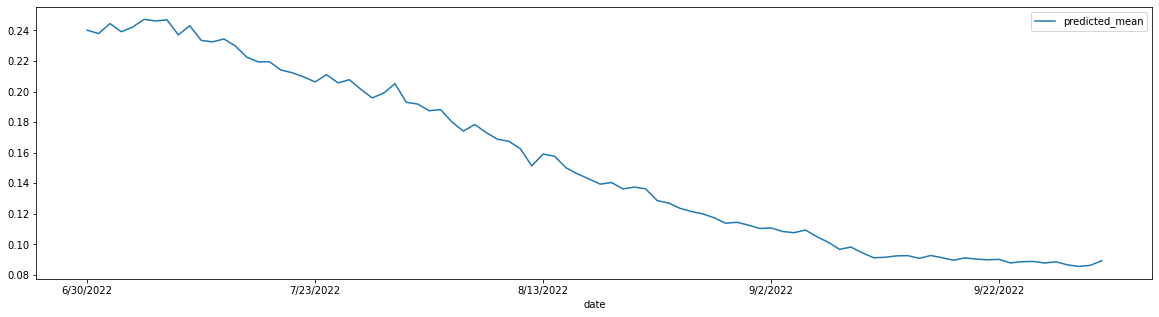

In [60]:
modela=ARIMA(endog=train['icu_patients_per_million'],exog=train.iloc[:,0:4] ,order=(0,2,3),seasonal_order=(1,0,0,14) )
modela=modela.fit()
modela.summary()
start=len(traini)
end=len(traini)+len(testi)-1
pred=modela.predict(exog=testi.iloc[:,0:4],start=start,end=end)
pred.index=df.index[start:end+1]
pred.plot(legend='ARIMA Predictions')

In [61]:
pred=pd.DataFrame(pred)
pred=pred.iloc[7:,:]
predictions=pd.DataFrame(predictions)
predictions.values.tolist()
predictions=predictions[0]
predictions.values.tolist()
predictions


0    -0.000213
1    -0.000275
2    -0.000393
3    -0.000453
4    -0.000601
        ...   
78   -0.005453
79   -0.005523
80   -0.005783
81   -0.005891
82    0.010049
Name: 0, Length: 83, dtype: float32

In [62]:
pred=np.array(pred)
pred= pred.tolist()
l= len(pred)
pred_final=[]
for i in range(l):
 temp = pred[i] + predictions[i]
 pred_final.append(temp)
 print(temp)
#error = mse(test.iloc[:23,-1],pred_final)
#print('Test MSE: %.3f' % error)
#Y = pd.DataFrame(testi.iloc[7:,-1])


#plt.plot(pred_final , color = 'r')
#plt.show()

[0.24664986]
[0.23676389]
[0.24264377]
[0.23298264]
[0.23186704]
[0.23376125]
[0.22911559]
[0.22176072]
[0.21876575]
[0.21889161]
[0.21355204]
[0.21183652]
[0.20911765]
[0.20574123]
[0.21034117]
[0.2047186]
[0.20662091]
[0.20033497]
[0.19463546]
[0.19780944]
[0.20407907]
[0.19197192]
[0.19087014]
[0.18641238]
[0.1870754]
[0.17906986]
[0.17313062]
[0.17785982]
[0.17288319]
[0.16867134]
[0.167266]
[0.16208781]
[0.1506602]
[0.15817439]
[0.15662828]
[0.1490021]
[0.14494542]
[0.14157978]
[0.13808]
[0.13919867]
[0.13505287]
[0.1362854]
[0.13497774]
[0.1272401]
[0.12560935]
[0.12210681]
[0.12002872]
[0.1184493]
[0.11590139]
[0.11213817]
[0.11245613]
[0.11043293]
[0.10806584]
[0.10843963]
[0.1061082]
[0.10527153]
[0.10679315]
[0.10225751]
[0.09833414]
[0.0935501]
[0.09503347]
[0.09117276]
[0.08792158]
[0.08814234]
[0.08896973]
[0.08891664]
[0.08700365]
[0.08875579]
[0.08720976]
[0.08543766]
[0.08684921]
[0.08573945]
[0.08507682]
[0.08502155]
[0.08248443]
[0.08315295]
[0.08346125]
[0.08249599]


In [63]:
p2=pred_final

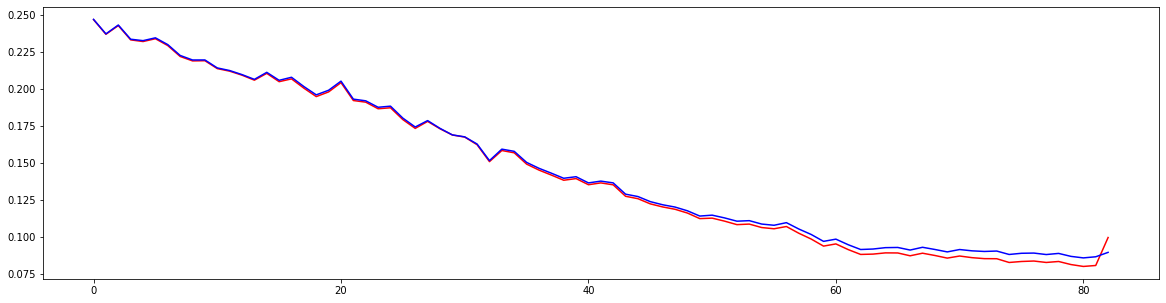

In [64]:
plt.plot(pred_final , label="ARIMA+ANN", color = 'r')
plt.plot(pred , label="ARIMA", color = 'b')

plt.show()

# **Model for country 3**

In [65]:
n3=c[2]
n3

'South Korea'

In [66]:
data6=data[data['location']==n3]
data6.pop('location')
data6.index=data6.date
data6.pop('date')
data6

,new_cases_per_million,new_deaths_per_million,reproduction_rate,total_vaccinations_per_hundred,stringency_index,population_density,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,icu_patients_per_million
date,,,,,,,,,,,,,,
3/28/2020,2.817,0.096,0.85,0.00,75.93,527.967,35938.374,85.998,6.8,6.2,40.9,12.27,83.03,1.524
3/29/2020,2.026,0.154,0.89,0.00,75.93,527.967,35938.374,85.998,6.8,6.2,40.9,12.27,83.03,1.505
3/30/2020,1.505,0.116,0.96,0.00,75.93,527.967,35938.374,85.998,6.8,6.2,40.9,12.27,83.03,1.428
3/31/2020,2.412,0.077,0.99,0.00,75.93,527.967,35938.374,85.998,6.8,6.2,40.9,12.27,83.03,1.428
4/1/2020,1.949,0.058,0.90,0.00,75.93,527.967,35938.374,85.998,6.8,6.2,40.9,12.27,83.03,1.466
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10/6/2022,429.461,0.791,0.82,249.58,11.11,527.967,35938.374,85.998,6.8,6.2,40.9,12.27,83.03,6.270
10/7/2022,373.894,0.617,0.82,249.60,11.11,527.967,35938.374,85.998,6.8,6.2,40.9,12.27,83.03,6.348
10/8/2022,340.613,0.560,0.82,249.61,11.11,527.967,35938.374,85.998,6.8,6.2,40.9,12.27,83.03,5.537


In [67]:
a=data6.index
b=data6.columns
data6=pd.DataFrame(scaler.transform(data6))
data6.index=a
data6.columns=b
df3=data6.iloc[:,[0,1,2,3,4,5,13]]
df3=clean_dataset(df3)
df3

,new_cases_per_million,new_deaths_per_million,reproduction_rate,total_vaccinations_per_hundred,stringency_index,population_density,icu_patients_per_million
date,,,,,,,
3/28/2020,0.000014,0.000173,0.160345,0.000000,0.7593,0.025689,0.008449
3/29/2020,0.000010,0.000278,0.167241,0.000000,0.7593,0.025689,0.008343
3/30/2020,0.000008,0.000209,0.179310,0.000000,0.7593,0.025689,0.007916
3/31/2020,0.000012,0.000139,0.184483,0.000000,0.7593,0.025689,0.007916
4/1/2020,0.000010,0.000105,0.168966,0.000000,0.7593,0.025689,0.008127
...,...,...,...,...,...,...,...
10/6/2022,0.002202,0.001428,0.155172,0.666631,0.1111,0.025689,0.034759
10/7/2022,0.001917,0.001114,0.155172,0.666684,0.1111,0.025689,0.035191
10/8/2022,0.001747,0.001011,0.155172,0.666711,0.1111,0.025689,0.030695


In [68]:
stepwise_fit = auto_arima(df3['icu_patients_per_million'],exog=df3.iloc[:,0:4], start_P=1,start_Q=1, start_D=1, m=14  ,trace=True, seasonal=True,
                          suppress_warnings=True)
print(df3.shape)
train=df3.iloc[:-90,:]
test=df3.iloc[-90:,:]
print(train.shape,test.shape)
#print(test.iloc[0],test.iloc[-1])

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[14] intercept   : AIC=-8706.985, Time=10.36 sec
 ARIMA(0,1,0)(0,0,0)[14] intercept   : AIC=-8735.912, Time=0.33 sec
 ARIMA(1,1,0)(1,0,0)[14] intercept   : AIC=-8857.541, Time=2.65 sec
 ARIMA(0,1,1)(0,0,1)[14] intercept   : AIC=-8854.977, Time=1.82 sec
 ARIMA(0,1,0)(0,0,0)[14]             : AIC=-8737.767, Time=0.22 sec
 ARIMA(1,1,0)(0,0,0)[14] intercept   : AIC=-8788.306, Time=0.28 sec
 ARIMA(1,1,0)(2,0,0)[14] intercept   : AIC=-8859.830, Time=8.59 sec
 ARIMA(1,1,0)(2,0,1)[14] intercept   : AIC=-8865.025, Time=9.00 sec
 ARIMA(1,1,0)(1,0,1)[14] intercept   : AIC=-8846.994, Time=2.46 sec
 ARIMA(1,1,0)(2,0,2)[14] intercept   : AIC=-8858.966, Time=5.10 sec
 ARIMA(1,1,0)(1,0,2)[14] intercept   : AIC=-8859.605, Time=11.41 sec
 ARIMA(0,1,0)(2,0,1)[14] intercept   : AIC=-8836.702, Time=10.81 sec
 ARIMA(2,1,0)(2,0,1)[14] intercept   : AIC=-8864.143, Time=10.90 sec
 ARIMA(1,1,1)(2,0,1)[14] intercept   : AIC=-8861.457, Time=14.40 sec


90
0.03561465690109429


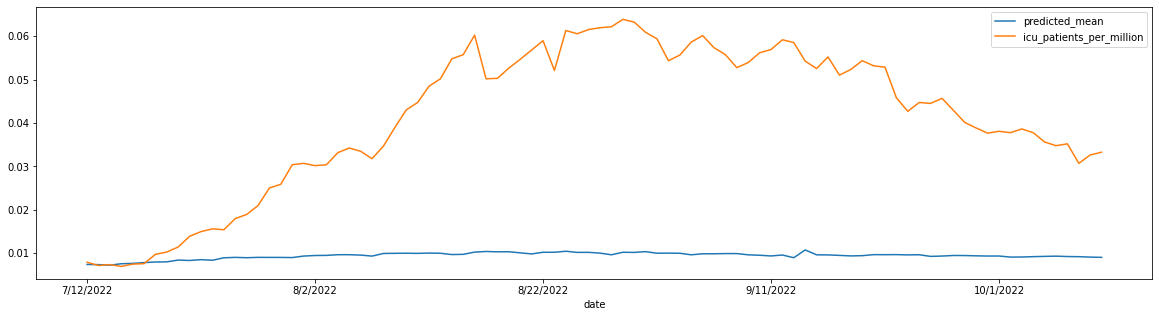

In [69]:
modela=ARIMA(endog=train['icu_patients_per_million'],exog=train.iloc[:,0:4] ,order=(1,1,0),seasonal_order=(2,0,1,14) )
modela=modela.fit()
modela.summary()
start=len(train)
end=len(train)+len(test)-1
pred=modela.predict(exog=test.iloc[:,0:4],start=start,end=end)
pred.index=df3.index[start:end+1]
print(len(pred))
pred.plot(legend='ARIMA Predictions')
test['icu_patients_per_million'].plot(legend=True)
test['icu_patients_per_million'].mean()
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(pred,test['icu_patients_per_million']))
print(rmse)

## **PREPING DATA FOR ANN**


In [70]:
predicted_list, error_list = [], []
training_data = train
modela = ARIMA(endog=train['icu_patients_per_million'],exog=train.iloc[:,0:4] ,order=(1,1,0),seasonal_order=(2,0,1,14))
model_fit = modela.fit()
for t in range(len(test)):
    predicted_value = pred[t]
    error_list.append(test.iloc[t,-1] - predicted_value)
    predicted_list.append(predicted_value)
    obs = test.iloc[t,-1]
    training_data[t]=obs
    
error = mean_squared_error(test.iloc[0:90,-1], predicted_list[0:90])
print('Test MSE: %.3f' % error)
training_error = model_fit.resid
training_error=np.array(training_error)

Test MSE: 0.001


##**Building ann model to predict error by seeing the previous 7 day error in prediction**

In [71]:
from keras.models import Sequential
from keras.layers import Dense,Activation
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error as mse

model = Sequential()
model.add(Dense(50, input_dim=7, activation="tanh"))
model.add(Dense(25,  activation="tanh"))
model.add(Dense(25,  activation="sigmoid"))
model.add(Dense(1))
model.add(Activation("linear"))
model.compile(loss='mean_squared_error', optimizer='adam')
train_X,train_Y = [],[]
for i in range(0 , len(training_error) - 7):
    train_X.append(training_error[i:i+7])
    train_Y.append(training_error[i+7])

train_X=np.array(train_X)
train_Y=np.array(train_Y)
new_train_X,new_train_Y = [],[]
for i in train_X:
    new_train_X.append(i.reshape(-1)) 
for i in train_Y:
    new_train_Y.append(i.reshape(-1))
new_train_X = np.array(new_train_X)
new_train_Y = np.array(new_train_Y)
model.fit(new_train_X,new_train_Y, epochs=100, batch_size=20,verbose=1)
test_data = []
for i in error_list:
    try:
        test_data.append(i[0])
    except:
        test_data.append(i)
test_data = np.array(test_data)

Epoch 1/100
42/42 [==============================] - 2s 7ms/step - loss: 0.2624
Epoch 2/100
42/42 [==============================] - 0s 5ms/step - loss: 0.0028
Epoch 3/100
42/42 [==============================] - 0s 5ms/step - loss: 2.6592e-05
Epoch 4/100
42/42 [==============================] - 0s 5ms/step - loss: 5.4986e-06
Epoch 5/100
42/42 [==============================] - 0s 6ms/step - loss: 5.1416e-06
Epoch 6/100
42/42 [==============================] - 0s 7ms/step - loss: 5.0209e-06
Epoch 7/100
42/42 [==============================] - 1s 20ms/step - loss: 4.8892e-06
Epoch 8/100
42/42 [==============================] - 0s 7ms/step - loss: 4.7646e-06
Epoch 9/100
42/42 [==============================] - 0s 7ms/step - loss: 4.6658e-06
Epoch 10/100
42/42 [==============================] - 0s 8ms/step - loss: 4.5901e-06
Epoch 11/100
42/42 [==============================] - 0s 8ms/step - loss: 4.3977e-06
Epoch 12/100
42/42 [==============================] - 0s 5ms/step - loss: 4.3203e

3/3 [==============================] - 0s 4ms/step


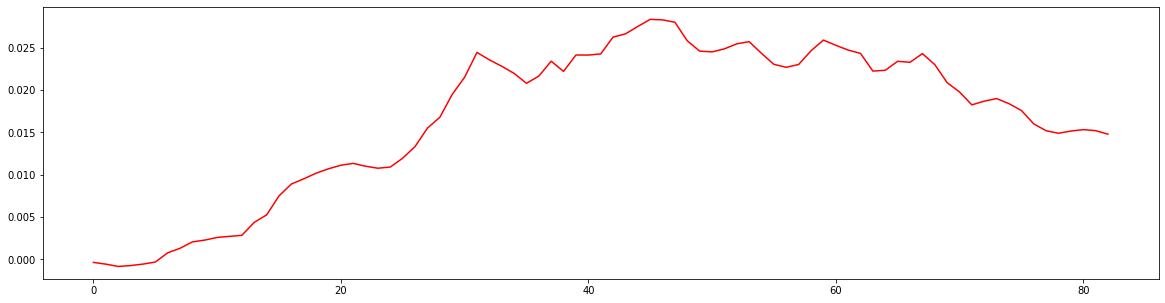

Test MSE: 0.000


In [72]:
test_X,test_Y = [],[]
for i in range(0 , len(test_data) - 7):
    test_X.append(test_data[i:i+7])
    test_Y.append(test_data[i+7])

new_test_X,new_test_Y = [],[]
for i in test_X:
    new_test_X.append(i.reshape(-1))
for i in test_Y:
    new_test_Y.append(i.reshape(-1))
new_test_X = np.array(new_test_X)
new_test_Y = np.array(new_test_Y)

predictions = model.predict(new_test_X)

Y = pd.DataFrame(new_test_Y)
pred = pd.DataFrame(predictions)

import matplotlib.pyplot as plt
plt.plot(predictions , color = 'r')
plt.show()
error = mse(test_data[7:],predictions)
print('Test MSE: %.3f' % error)

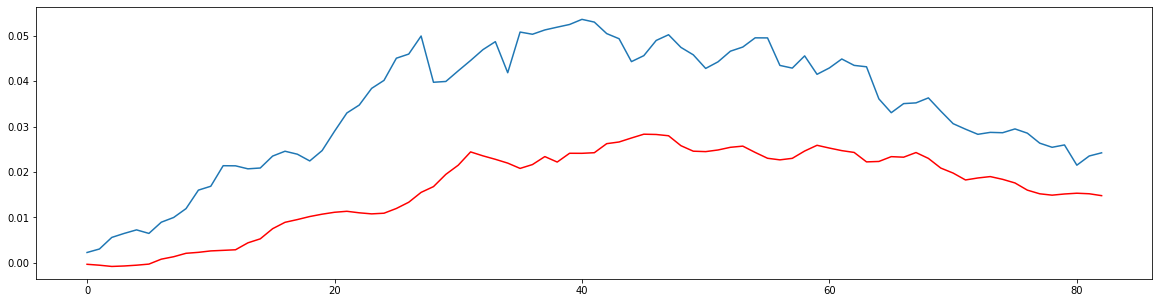

Test MSE: 0.000


In [73]:
plt.plot(Y)
plt.plot(pred , color = 'r')
#p.plot()
plt.show()
error = mse(test_data[7:],predictions)
print('Test MSE: %.3f' % error)

##**Calculating the sum of prediction value by arima and amount error by the ann***

Test MSE: 0.000


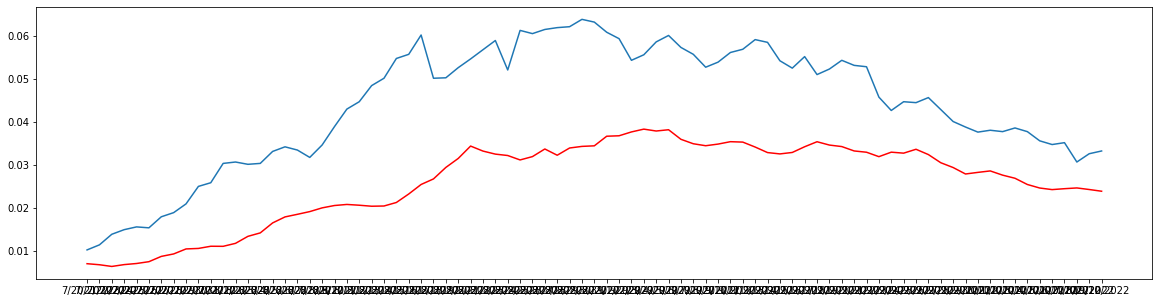

In [74]:
pred=np.array(pred)
pred= pred.tolist()
l= len(pred)
pred_final=[]
for i in range(l):
 temp = pred[i] + predicted_list[i]
 pred_final.append(temp)
error = mse(test.iloc[:83,-1],pred_final)
print('Test MSE: %.3f' % error)
Y = pd.DataFrame(test.iloc[7:,-1])
pred = pd.DataFrame(pred_final)
plt.plot(Y)
plt.plot(pred , color = 'r')
plt.rcParams['figure.figsize'] = [20, 5]
#p.plot()
plt.show()

# **Predicting for new country using 3NN**


In [75]:
data4=unclean_data[unclean_data.location=='India']
data4.pop('Pkey')
#data4.pop('human_development_index')
#data4.pop('gdp_percentage_weekly')
data4=data4.iloc[:,1:]
data4.pop('location')
data4.index=data4.date
data4.pop('date')
data4

,new_cases_per_million,new_deaths_per_million,reproduction_rate,total_vaccinations_per_hundred,stringency_index,population_density,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,icu_patients_per_million
date,,,,,,,,,,,,,,
1/30/2020,0.001,NaN,NaN,NaN,10.19,450.419,6426.674,282.28,10.39,1.9,20.6,0.53,69.66,NaN
1/31/2020,0.000,NaN,NaN,NaN,10.19,450.419,6426.674,282.28,10.39,1.9,20.6,0.53,69.66,NaN
2/1/2020,0.000,NaN,NaN,NaN,10.19,450.419,6426.674,282.28,10.39,1.9,20.6,0.53,69.66,NaN
2/2/2020,0.001,NaN,NaN,NaN,10.19,450.419,6426.674,282.28,10.39,1.9,20.6,0.53,69.66,NaN
2/3/2020,0.001,NaN,NaN,NaN,10.19,450.419,6426.674,282.28,10.39,1.9,20.6,0.53,69.66,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10/8/2022,1.958,0.015,NaN,155.54,NaN,450.419,6426.674,282.28,10.39,1.9,20.6,0.53,69.66,NaN
10/9/2022,1.722,0.011,NaN,155.57,NaN,450.419,6426.674,282.28,10.39,1.9,20.6,0.53,69.66,NaN
10/10/2022,1.390,0.006,NaN,155.59,NaN,450.419,6426.674,282.28,10.39,1.9,20.6,0.53,69.66,NaN


In [76]:
a=data4.index
b=data4.columns
data4=pd.DataFrame(scaler.transform(data4))
data4.index=a
data4.columns=b

In [77]:
df=data4.iloc[:,[0,1,2,3,4,5,13]]

In [78]:
df=df.iloc[:,:-1]
df=clean_dataset(df)

In [79]:
traini=df.iloc[:-90,:]
testi=df.iloc[-90:,:]

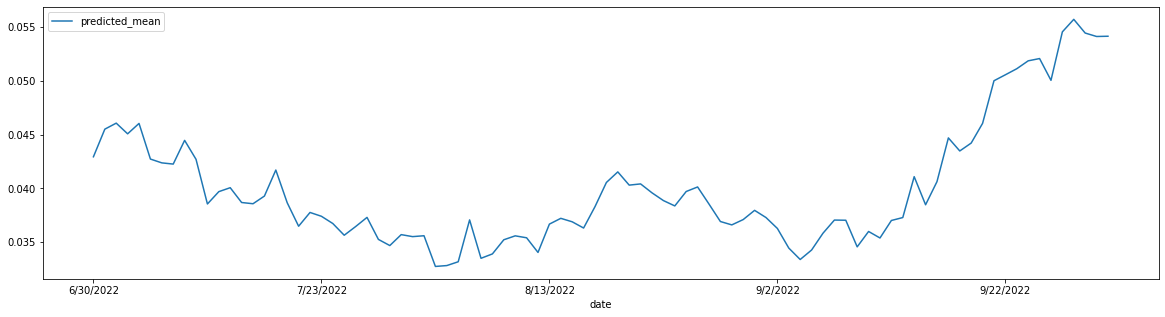

In [80]:
modela=ARIMA(endog=train['icu_patients_per_million'],exog=train.iloc[:,0:4] ,order=(1,1,0),seasonal_order=(2,0,1,14) )
modela=modela.fit()
modela.summary()
start=len(traini)
end=len(traini)+len(testi)-1
pred=modela.predict(exog=testi.iloc[:,0:4],start=start,end=end)
pred.index=df.index[start:end+1]
pred.plot(legend='ARIMA Predictions')

In [81]:
pred=pd.DataFrame(pred)
pred=pred.iloc[7:,:]
predictions=pd.DataFrame(predictions)
predictions.values.tolist()
predictions=predictions[0]
predictions.values.tolist()
predictions


0    -0.000346
1    -0.000548
2    -0.000821
3    -0.000719
4    -0.000544
        ...   
78    0.014888
79    0.015148
80    0.015316
81    0.015196
82    0.014781
Name: 0, Length: 83, dtype: float32

In [82]:
pred=np.array(pred)
pred= pred.tolist()
l= len(pred)
pred_final=[]
for i in range(l):
 temp = pred[i] + predictions[i]
 pred_final.append(temp)
 print(temp)
#error = mse(test.iloc[:23,-1],pred_final)
#print('Test MSE: %.3f' % error)
#Y = pd.DataFrame(testi.iloc[7:,-1])


#plt.plot(pred_final , color = 'r')
#plt.show()

[0.04191752]
[0.0439239]
[0.04188558]
[0.03782854]
[0.03915218]
[0.03975948]
[0.0394681]
[0.03989079]
[0.0413617]
[0.04399399]
[0.04126225]
[0.03920223]
[0.04061075]
[0.04178415]
[0.04199045]
[0.04313538]
[0.04534857]
[0.04680975]
[0.04542788]
[0.04537329]
[0.0468106]
[0.0468422]
[0.04658957]
[0.04349564]
[0.04372173]
[0.04512115]
[0.05039318]
[0.04899357]
[0.05066996]
[0.0546931]
[0.05707239]
[0.05982141]
[0.05758519]
[0.05946395]
[0.05916423]
[0.0576726]
[0.05793959]
[0.06168862]
[0.06273539]
[0.06565545]
[0.06441412]
[0.06465889]
[0.06582364]
[0.06547437]
[0.06585355]
[0.0680326]
[0.06839405]
[0.0665198]
[0.06270539]
[0.061178]
[0.06158092]
[0.06280172]
[0.06272013]
[0.06196263]
[0.05875055]
[0.05639579]
[0.05692816]
[0.05882883]
[0.06166616]
[0.06291263]
[0.05982293]
[0.06069061]
[0.05968611]
[0.05923386]
[0.05959961]
[0.06446625]
[0.06173297]
[0.06490989]
[0.06769074]
[0.06434807]
[0.06397547]
[0.06429097]
[0.06869779]
[0.06955933]
[0.06951789]
[0.06945338]
[0.06808475]
[0.0652494

In [83]:
p3=pred_final
pred_final

[array([0.04191752]),
 array([0.0439239]),
 array([0.04188558]),
 array([0.03782854]),
 array([0.03915218]),
 array([0.03975948]),
 array([0.0394681]),
 array([0.03989079]),
 array([0.0413617]),
 array([0.04399399]),
 array([0.04126225]),
 array([0.03920223]),
 array([0.04061075]),
 array([0.04178415]),
 array([0.04199045]),
 array([0.04313538]),
 array([0.04534857]),
 array([0.04680975]),
 array([0.04542788]),
 array([0.04537329]),
 array([0.0468106]),
 array([0.0468422]),
 array([0.04658957]),
 array([0.04349564]),
 array([0.04372173]),
 array([0.04512115]),
 array([0.05039318]),
 array([0.04899357]),
 array([0.05066996]),
 array([0.0546931]),
 array([0.05707239]),
 array([0.05982141]),
 array([0.05758519]),
 array([0.05946395]),
 array([0.05916423]),
 array([0.0576726]),
 array([0.05793959]),
 array([0.06168862]),
 array([0.06273539]),
 array([0.06565545]),
 array([0.06441412]),
 array([0.06465889]),
 array([0.06582364]),
 array([0.06547437]),
 array([0.06585355]),
 array([0.0680326

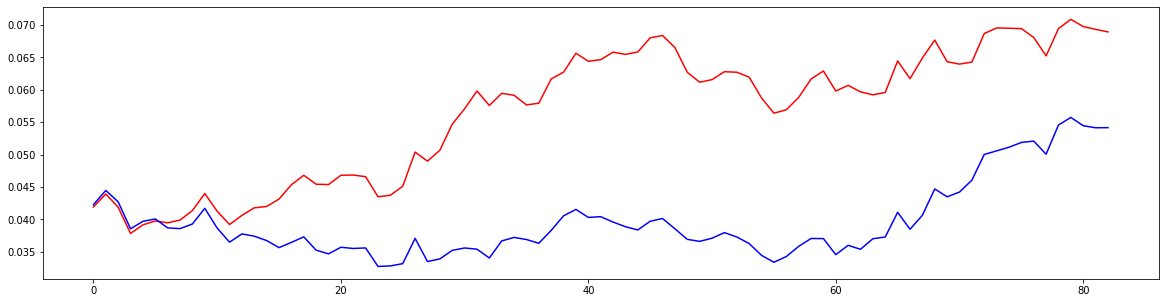

In [84]:
plt.plot(pred_final , label="ARIMA+ANN", color = 'r')
plt.plot(pred , label="ARIMA", color = 'b')

plt.show()

#**Exporting Results**

In [85]:
tmp=data1.iloc[-83:,:]

In [86]:
p1=list(p1)
p2=list(p2)
p3=list(p3)

In [87]:
tmp

,new_cases_per_million,new_deaths_per_million,reproduction_rate,total_vaccinations_per_hundred,stringency_index,population_density,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,icu_patients_per_million
date,,,,,,,,,,,,,,
7/20/2022,5.687025e-06,0.000000,0.293103,0.0,0.4532,0.000838,0.113977,0.308495,0.194313,0.013667,0.322443,0.137681,0.705109,0.000377
7/21/2022,7.312621e-06,0.000000,0.293103,0.0,0.4532,0.000838,0.113977,0.308495,0.194313,0.013667,0.322443,0.137681,0.705109,0.000377
7/22/2022,5.338316e-06,0.000000,0.291379,0.0,0.4532,0.000838,0.113977,0.308495,0.194313,0.013667,0.322443,0.137681,0.705109,0.000377
7/23/2022,8.358747e-06,0.000000,0.294828,0.0,0.4532,0.000838,0.113977,0.308495,0.194313,0.013667,0.322443,0.137681,0.705109,0.000377
7/24/2022,7.779275e-06,0.000042,0.293103,0.0,0.4532,0.000838,0.113977,0.308495,0.194313,0.013667,0.322443,0.137681,0.705109,0.000504
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10/6/2022,4.666540e-07,0.000081,0.124138,0.0,0.4532,0.000838,0.113977,0.308495,0.194313,0.013667,0.322443,0.137681,0.705109,0.000128
10/7/2022,4.666540e-07,0.000000,0.124138,0.0,0.4532,0.000838,0.113977,0.308495,0.194313,0.013667,0.322443,0.137681,0.705109,0.000128
10/8/2022,0.000000e+00,0.000000,0.124138,0.0,0.4532,0.000838,0.113977,0.308495,0.194313,0.013667,0.322443,0.137681,0.705109,0.000128


In [88]:
i=0
for row,index in tmp.iterrows():
  tmp.iloc[i,13]=p1[i]
  i=i+1
jnk=pd.DataFrame(scaler.inverse_transform(tmp))
p1=jnk.iloc[:,-1]
p1

0     0.341557
1     0.341902
2     0.280027
3     0.328955
4     0.254043
        ...   
78   -0.077006
79   -0.068586
80   -0.075391
81   -0.073980
82   -0.065904
Name: 13, Length: 83, dtype: float64

In [89]:
i=0
for row,index in tmp.iterrows():
  tmp.iloc[i,13]=p2[i]
  i=i+1
jnk=pd.DataFrame(scaler.inverse_transform(tmp))
p2=jnk.iloc[:,-1]
p2

0     44.492428
1     42.709127
2     43.769783
3     42.027039
4     41.825800
        ...    
78    15.000064
79    14.626040
80    14.394831
81    14.511144
82    17.923206
Name: 13, Length: 83, dtype: float64

In [90]:
i=0
for row,index in tmp.iterrows():
  tmp.iloc[i,13]=p3[i]
  i=i+1
jnk=pd.DataFrame(scaler.inverse_transform(tmp))
p3=jnk.iloc[:,-1]
p3

0      7.561375
1      7.923300
2      7.555613
3      6.823776
4      7.062545
        ...    
78    12.530048
79    12.787014
80    12.587467
81    12.508003
82    12.437200
Name: 13, Length: 83, dtype: float64

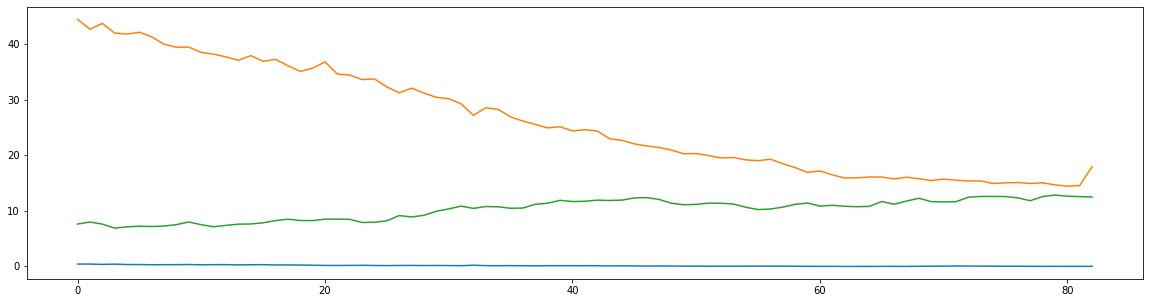

In [91]:
plt.plot(p1)
plt.plot(p2)
plt.plot(p3)
plt.show()

In [92]:
final={c[0]:p1,c[1]:p2,c[2]:p3}
final=pd.DataFrame(final)
final.to_csv('Output_2023_01_31.csv')